In [1]:
from cassandra.cluster import Cluster
import csv
import pandas as pd

In [2]:
cluster = Cluster(['localhost'])  # Replace with your Cassandra instance address
session = cluster.connect('nirf')  # Replace with your keyspace name

In [55]:
nirf_score_insert_stmt = session.prepare("""
    INSERT INTO nirf_score_by_faculty (
        faculty_name, year, rank, aggregated_score, 
        teaching_learning_and_resources, research_and_professional_practice, 
        graduation_outcomes, outreach_and_inclusivity, peer_perception
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
""")

faculty_list_insert_stmt = session.prepare("""
    INSERT INTO faculties_list (faculty_name) VALUES (?)
""")

nirf_score_change_prior_insert_stmt = session.prepare("""
    INSERT INTO nirf_score_change_by_prior_perception (
        rounded_prior_perception, faculty_improved, change_in_teaching_learning_and_resources,
        change_in_research_and_professional_practice, change_in_graduation_outcomes,
        change_in_outreach_and_inclusivity, change_in_peer_perception
    ) VALUES (?, ?, ?, ?, ?, ?, ?)
""")

nirf_score_change_post_insert_stmt = session.prepare("""
    INSERT INTO nirf_score_change_by_post_perception (
        rounded_post_perception, faculty_improved, change_in_teaching_learning_and_resources,
        change_in_research_and_professional_practice, change_in_graduation_outcomes,
        change_in_outreach_and_inclusivity, change_in_peer_perception
    ) VALUES (?, ?, ?, ?, ?, ?, ?)
""")

get_all_information_for_faculty = session.prepare("""
    SELECT * FROM nirf_score_by_faculty WHERE faculty_name=?
""")

In [35]:
for i in range(2016, 2022):
    file_path = f'/Users/omersegal/University/Year 3/Semester 1/Big Data Platform/Homework/Exercise 1/NIRF-Rankings/Dataset/{i}/EngineeringRanking_{i}.csv'
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)
        for row in reader:
            session.execute(nirf_score_insert_stmt, (row[1], i, int(row[5]), float(row[4]), float(row[6]), float(row[7]), float(row[8]), float(row[9]), float(row[10])))
            session.execute(faculty_list_insert_stmt, (row[1],))

In [43]:
# make path relative and not absolute (for ingestion)

In [56]:
rows = session.execute("""
    SELECT * FROM faculties_list;
""")

for row in rows:
    faculty_name = row[0]
    information = session.execute(get_all_information_for_faculty, [faculty_name])
    df = pd.DataFrame(list(information))
    df = df.round(2)
    num_rows, _ = df.shape
    for j in range (0, num_rows - 1):
        n = df.iloc[j]
        np = df.iloc[j+1]
        delta_tlr = np[8] - n[8]
        delta_rpp = np[7] - n[7]
        delta_go = np[3] - n[3]
        delta_oi = np[4] - n[4]
        delta_pp = np[5] - n[5]
        session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
        session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_post_insert_stmt, (int(np[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh00000gn/T/ipykernel_76203/1760089048.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  session.execute(nirf_score_change_prior_insert_stmt, (int(n[5]), delta_pp>0, delta_tlr, delta_rpp, delta_go, delta_oi, delta_pp))
/var/folders/by/lyqjn7ln7hj1np3cyylg0zh0000

In [53]:
rows, columns = df.shape
print(rows, columns)

5 9


In [54]:
df

,faculty_name,year,aggregated_score,graduation_outcomes,outreach_and_inclusivity,peer_perception,rank,research_and_professional_practice,teaching_learning_and_resources
0,National Institute of Technology Kurukshetra,2017,41.61,53.50,58.03,8.53,60,28.60,52.27
1,National Institute of Technology Kurukshetra,2018,46.29,60.94,42.36,7.35,43,37.89,59.20
2,National Institute of Technology Kurukshetra,2019,47.58,58.47,51.21,13.66,41,36.64,61.36
3,National Institute of Technology Kurukshetra,2020,51.19,61.65,54.75,17.42,40,41.64,63.85
4,National Institute of Technology Kurukshetra,2021,50.59,62.01,53.66,19.73,44,40.64,62.20


In [62]:
cluster.shutdown()

In [60]:
result_set = session.execute("""
    SELECT * FROM nirf_score_change_by_prior_perception;
""")
df = pd.DataFrame(list(result_set))
df_sorted = df.sort_values(by='rounded_prior_perception', ascending=True)

In [67]:
df_sorted

,rounded_prior_perception,change_in_peer_perception,change_in_graduation_outcomes,change_in_outreach_and_inclusivity,change_in_research_and_professional_practice,change_in_teaching_learning_and_resources,faculty_improved
144,0,-0.55,-2.46,-1.31,7.39,6.71,False
148,0,0.55,1.83,0.20,3.73,-3.18,True
149,0,0.69,-0.31,1.12,1.20,2.26,True
150,0,0.74,0.39,2.65,-1.64,7.81,True
152,0,0.82,-0.65,-0.28,-0.52,-0.70,True
...,...,...,...,...,...,...,...
406,90,3.61,0.04,8.62,-0.03,4.99,True
377,92,0.37,2.11,3.69,-0.81,-1.68,True
343,93,-3.87,-0.06,3.46,-0.74,-0.49,False
237,94,4.17,0.61,1.58,-0.33,0.97,True


In [64]:
df

,rounded_prior_perception,change_in_peer_perception,change_in_graduation_outcomes,change_in_outreach_and_inclusivity,change_in_research_and_professional_practice,change_in_teaching_learning_and_resources,faculty_improved
0,23,-22.43,1.00,-14.16,13.03,0.50,False
1,55,-5.41,-0.05,9.30,4.14,4.22,False
2,55,5.04,-0.17,-0.23,3.29,3.60,True
3,33,-11.59,-4.45,-0.20,4.13,-0.18,False
4,33,-0.33,2.67,-20.67,-2.88,-1.16,False
...,...,...,...,...,...,...,...
426,3,3.64,0.81,8.16,1.59,1.41,True
427,3,4.40,3.84,-3.66,-2.61,-0.91,True
428,3,6.00,-0.18,-2.71,-2.58,-0.31,True
429,3,6.67,-0.30,11.26,0.52,3.16,True


In [68]:
print(df.columns)

Index(['rounded_prior_perception', 'change_in_peer_perception',
       'change_in_graduation_outcomes', 'change_in_outreach_and_inclusivity',
       'change_in_research_and_professional_practice',
       'change_in_teaching_learning_and_resources', 'faculty_improved'],
      dtype='object')


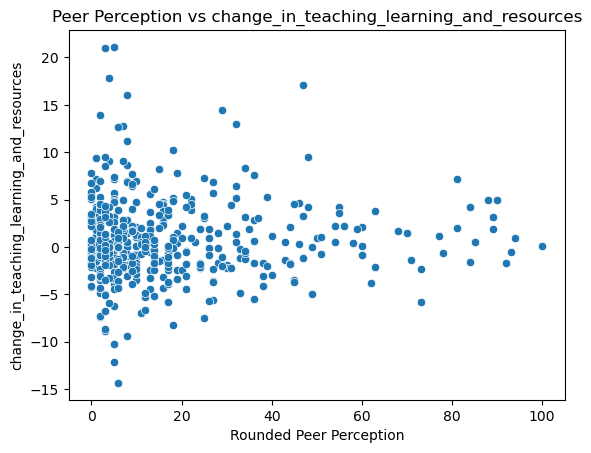

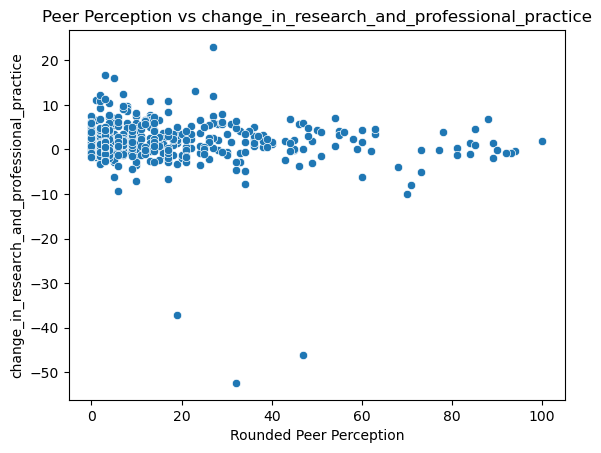

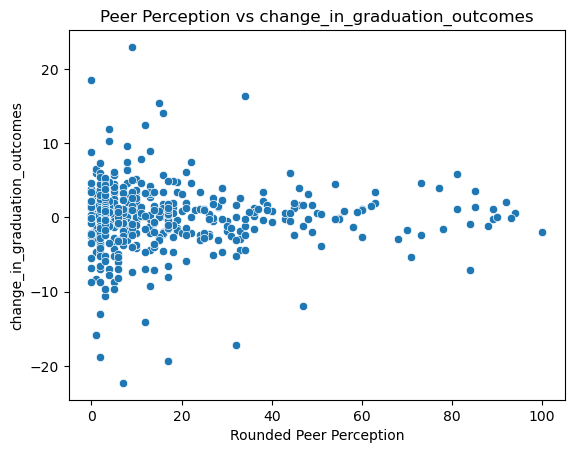

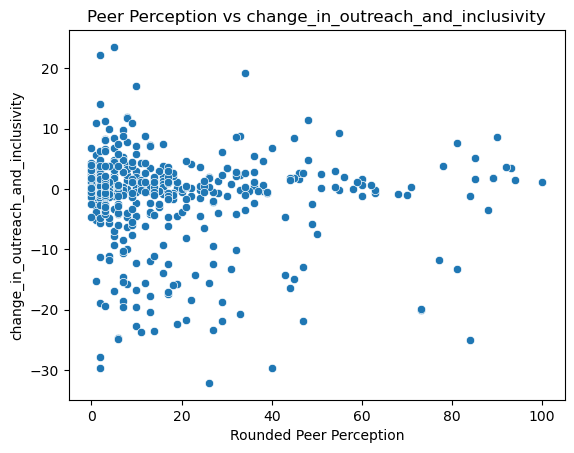

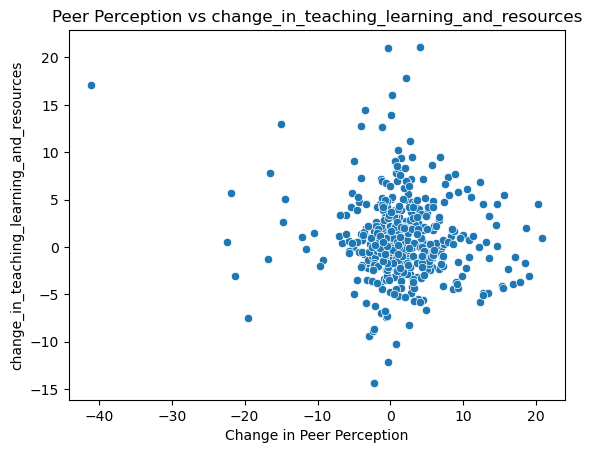

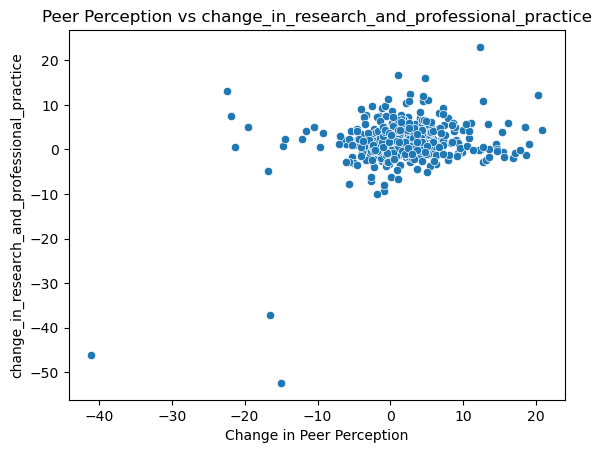

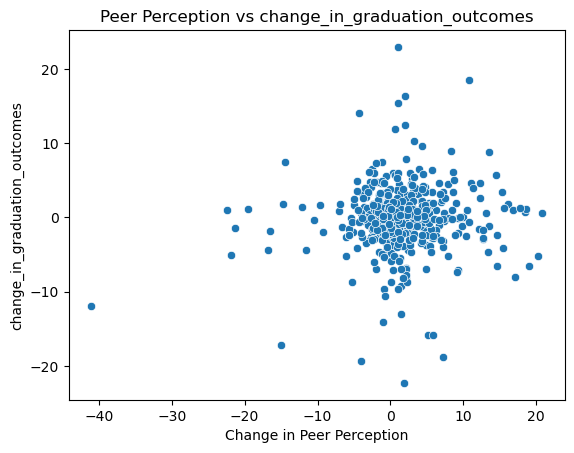

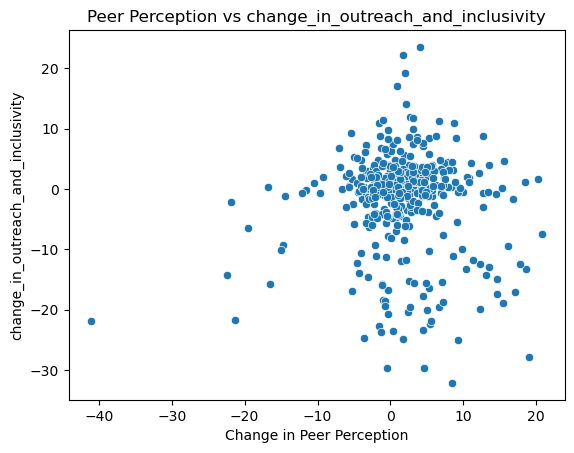

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df

# List of score columns to compare with peer_perception
score_columns = ['change_in_teaching_learning_and_resources', 'change_in_research_and_professional_practice', 'change_in_graduation_outcomes', 'change_in_outreach_and_inclusivity']

# Scatter plots
for col in score_columns:
    sns.scatterplot(data=df, x='rounded_prior_perception', y=col)
    plt.title(f'Peer Perception vs {col}')
    plt.xlabel('Rounded Peer Perception')
    plt.ylabel(col)
    plt.show()

    
for col in score_columns:
    sns.scatterplot(data=df, x='change_in_peer_perception', y=col)
    plt.title(f'Peer Perception vs {col}')
    plt.xlabel('Change in Peer Perception')
    plt.ylabel(col)
    plt.show()

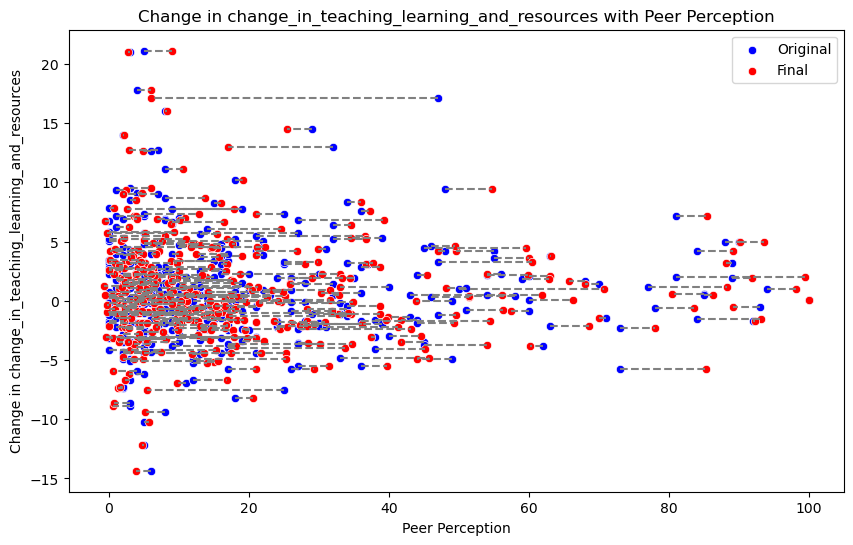

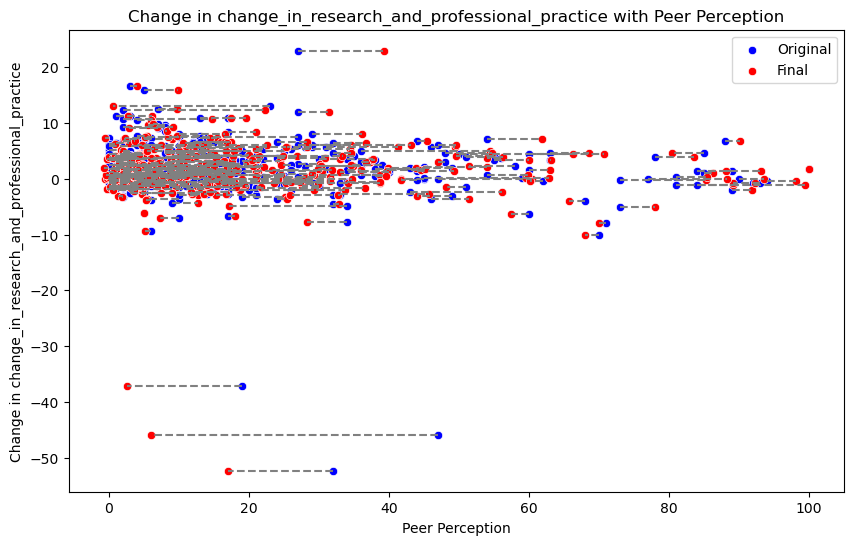

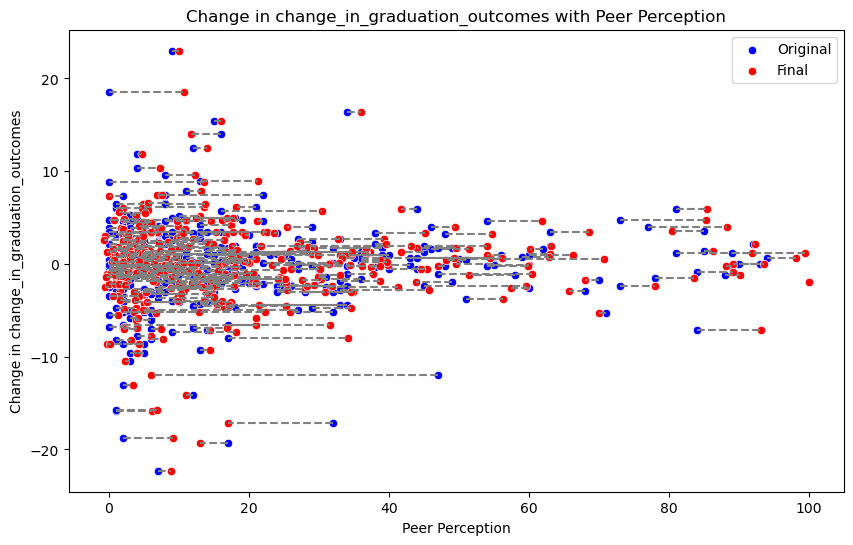

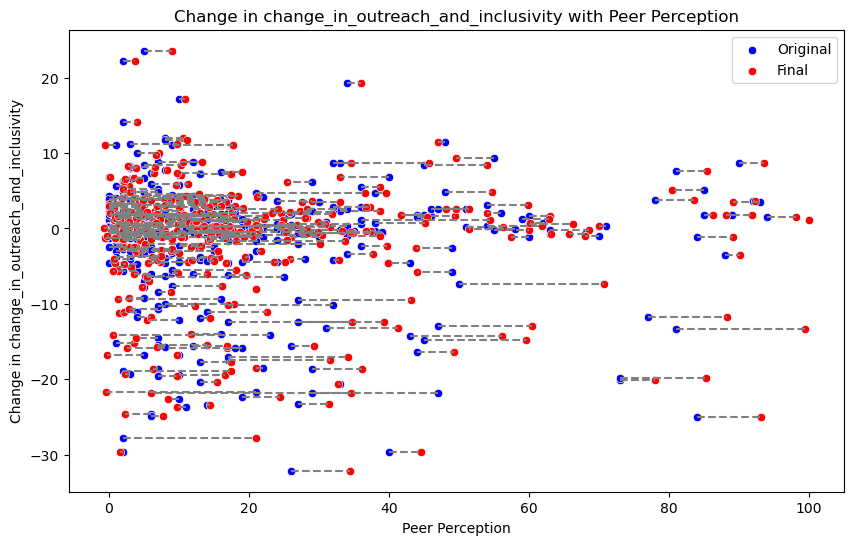

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Calculate 'final_peer_perception'
df['final_peer_perception'] = df['rounded_prior_perception'] + df['change_in_peer_perception']

# Factors to compare
factors = ['change_in_teaching_learning_and_resources', 'change_in_research_and_professional_practice', 
           'change_in_graduation_outcomes', 'change_in_outreach_and_inclusivity']

for factor in factors:
    plt.figure(figsize=(10, 6))
    # Plotting the scatter plot
    sns.scatterplot(data=df, x='rounded_prior_perception', y=factor, color='blue', label='Original')
    sns.scatterplot(data=df, x='final_peer_perception', y=factor, color='red', label='Final')

    # Linking pairs of points
    for index, row in df.iterrows():
        plt.plot([row['rounded_prior_perception'], row['final_peer_perception']],
                 [row[factor], row[factor]], 'gray', linestyle='--')

    plt.title(f'Change in {factor} with Peer Perception')
    plt.xlabel('Peer Perception')
    plt.ylabel(f'Change in {factor}')
    plt.legend()
    plt.show()


In [84]:
result_set = session.execute("""
    SELECT * FROM nirf_score_change_by_prior_perception WHERE rounded_prior_perception=30;
""")
df = pd.DataFrame(list(result_set))
df = df.round(2)
df

,rounded_prior_perception,change_in_peer_perception,change_in_graduation_outcomes,change_in_outreach_and_inclusivity,change_in_research_and_professional_practice,change_in_teaching_learning_and_resources,faculty_improved
0,30,-3.94,-0.51,-1.16,-0.62,-1.87,False
1,30,-2.40,-1.77,3.49,-1.24,-2.17,False
2,30,2.99,-1.21,3.54,3.54,2.24,True


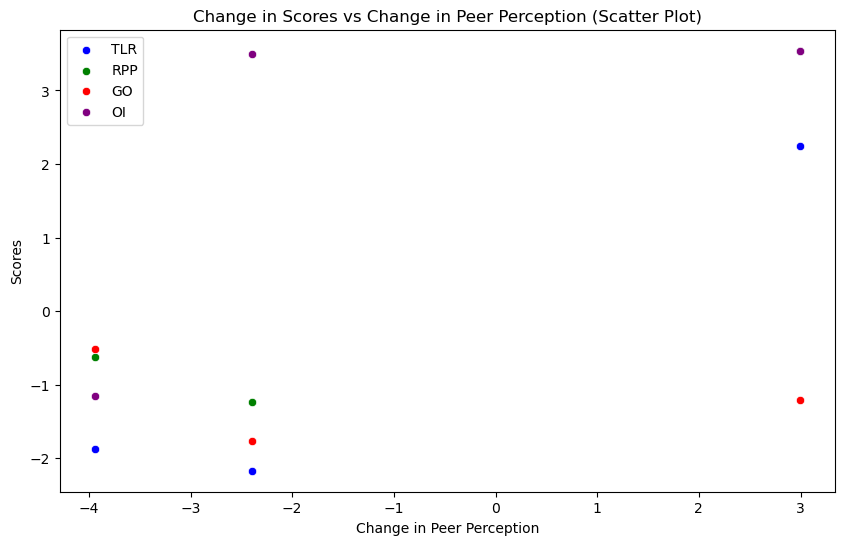

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Plotting each score in a different color
sns.scatterplot(data=df, x='change_in_peer_perception', y='change_in_teaching_learning_and_resources', color='blue', label='TLR')
sns.scatterplot(data=df, x='change_in_peer_perception', y='change_in_research_and_professional_practice', color='green', label='RPP')
sns.scatterplot(data=df, x='change_in_peer_perception', y='change_in_graduation_outcomes', color='red', label='GO')
sns.scatterplot(data=df, x='change_in_peer_perception', y='change_in_outreach_and_inclusivity', color='purple', label='OI')

plt.title('Change in Scores vs Change in Peer Perception (Scatter Plot)')
plt.xlabel('Change in Peer Perception')
plt.ylabel('Scores')
plt.legend()
plt.show()


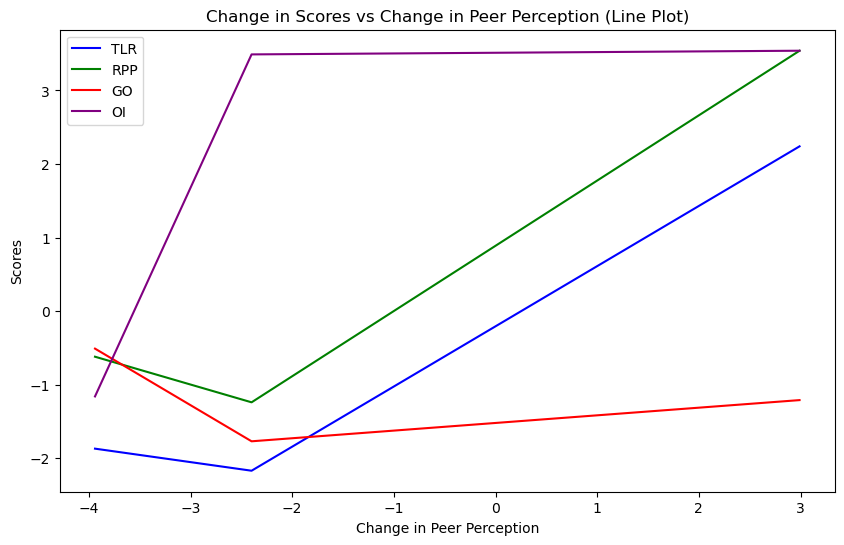

In [86]:
plt.figure(figsize=(10, 6))

# Plotting each score in a different color
plt.plot(df['change_in_peer_perception'], df['change_in_teaching_learning_and_resources'], color='blue', label='TLR')
plt.plot(df['change_in_peer_perception'], df['change_in_research_and_professional_practice'], color='green', label='RPP')
plt.plot(df['change_in_peer_perception'], df['change_in_graduation_outcomes'], color='red', label='GO')
plt.plot(df['change_in_peer_perception'], df['change_in_outreach_and_inclusivity'], color='purple', label='OI')

plt.title('Change in Scores vs Change in Peer Perception (Line Plot)')
plt.xlabel('Change in Peer Perception')
plt.ylabel('Scores')
plt.legend()
plt.show()


## Database Schema

In [ ]:
cqlsh

In [ ]:
CREATE KEYSPACE IF NOT EXISTS nirf WITH replication = {
    'class': 'SimpleStrategy',
    'replication_factor': 1
};

In [ ]:
DESCRIBE keyspaces;

In [ ]:
USE nirf;

In [ ]:
CREATE TABLE nirf_score_by_faculty (
    faculty_name TEXT,
    year int,
    rank int,
    aggregated_score float,
    teaching_learning_and_resources float,
    research_and_professional_practice float,
    graduation_outcomes float,
    outreach_and_inclusivity float,
    peer_perception float,
    PRIMARY KEY (faculty_name, year)
);

In [ ]:
CREATE TABLE faculties_list (
    faculty_name TEXT PRIMARY KEY
);

In [ ]:
CREATE TABLE nirf_score_change_by_prior_perception (
    rounded_prior_perception int,
    faculty_improved boolean,
    change_in_teaching_learning_and_resources float,
    change_in_research_and_professional_practice float,
    change_in_graduation_outcomes float,
    change_in_outreach_and_inclusivity float,
    change_in_peer_perception float,
    PRIMARY KEY (rounded_prior_perception, change_in_peer_perception)
);

In [ ]:
CREATE TABLE nirf_score_change_by_post_perception (
    rounded_post_perception int,
    faculty_improved boolean,
    change_in_teaching_learning_and_resources float,
    change_in_research_and_professional_practice float,
    change_in_graduation_outcomes float,
    change_in_outreach_and_inclusivity float,
    change_in_peer_perception float,
    PRIMARY KEY (rounded_post_perception, change_in_peer_perception)
);

In [28]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/Users/omersegal/University/Year 3/Semester 1/Big Data Platform/Homework/Exercise 1/NIRF-Rankings/Dataset/2021/EngineeringRanking_2021.csv')

# Find duplicates based on faculty name
duplicates = df[df.duplicated('Institute Name', keep=False)]

# Selecting only the faculty_id and faculty_name columns
duplicate_faculty_ids = duplicates[['Institute Id', 'Institute Name']]

# Display the results
print(duplicates)


Empty DataFrame
Columns: [Institute Id, Institute Name, City, State, Score, Rank, TLR, RPC, GO, OI, Perception]
Index: []
